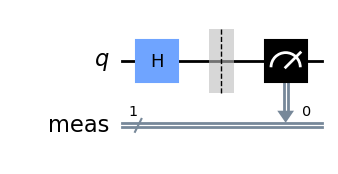

{'0': 539, '1': 485}


In [1]:
#-------------------------------------------------------------------------
# Quantum Depolarizing Noise Simulation
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt
import numpy as np
from qiskit import QuantumCircuit, Aer, execute  
from qiskit.visualization import circuit_drawer
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error 
import warnings
warnings.filterwarnings('ignore')
#-------------------------------------------------------------------------

# Create a quantum circuit  
qc = QuantumCircuit(1)

# Apply Hadamard gate  
qc.h(0)  

# Execute the measurement
qc.measure_all()  

# Draw the circuits
display(circuit_drawer(qc, output='mpl', style="iqp"))

# Define a depolarizing noise model  
noise_model = NoiseModel()  
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 1), ['h'])  

# Simulate the circuit with noise  
simulator = Aer.get_backend('aer_simulator')  
result = execute(qc, simulator, noise_model=noise_model).result()  
print(result.get_counts())  
